In [4]:
import os  
import numpy as np
import struct
import matplotlib.pyplot as plt
import gc
import random
import math
from tensorflow import keras
from sklearn.decomposition import PCA

In [253]:
with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "rb") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    sig1 = np.zeros((NM1,200),dtype = np.float32)
    an1 = np.zeros((NM1,4),dtype = np.float32)
    for i in range(NM1):
        for k in range(4):
            data1 = file0.read(4)
            an1[i,k] = struct.unpack("f", data1)[0]
        for k in range(200):
            data1 = file0.read(4)
            sig1[i,k] = struct.unpack("f", data1)[0]  
    # data1 = file0.read(len('end\0'))
    # end = struct.unpack("4s", data1)[0]  

In [254]:
with open("C:\\Users\\Administrator\\source\\data\\dataset0.0.bin", "rb") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    sig2 = np.zeros((NM1,200),dtype = np.float32)
    an2 = np.zeros((NM1,4),dtype = np.float32)
    for i in range(NM1):
        for k in range(4):
            data1 = file0.read(4)
            an2[i,k] = struct.unpack("f", data1)[0]
        for k in range(200):
            data1 = file0.read(4)
            sig2[i,k] = struct.unpack("f", data1)[0]  
    # data1 = file0.read(len('end\0'))
    # end = struct.unpack("4s", data1)[0]  

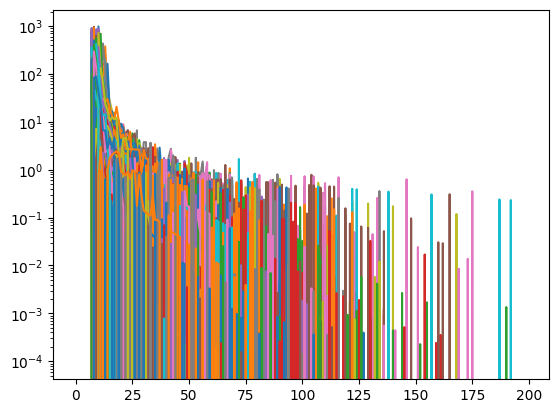

1262


In [206]:
plt.axes(yscale = "log") 
for n in range(sig1.shape[0]):
    plt.plot(sig1[n])
plt.show()
print(sig1.shape[0])
# print(an2[-1])

In [281]:
print(sig1.shape)
print(an1.shape)
print(sig2.shape)
print(an2.shape)
# num_labels = 10
x_train = sig1
y_train = an1
x_test = sig2
y_test = an2

x_train = np.log10((x_train+1e-6)/1000)+11
x_test = np.log10((x_test+1e-6)/1000)+11

(1262, 200)
(1262, 4)
(167, 200)
(167, 4)


In [282]:
n_components=8

x_train = x_train.reshape((x_train.shape[1],x_train.shape[0]))
x_test = x_test.reshape((x_test.shape[1],x_test.shape[0]))
pca = PCA(n_components = n_components)
# x_train1 = np.zeros((x_train.shape[0],n_components))

x_train = pca.fit(x_train).components_
x_test = pca.fit(x_test).components_

In [283]:
x_train = x_train.reshape((x_train.shape[1],x_train.shape[0]))
x_test = x_test.reshape((x_test.shape[1],x_test.shape[0]))

In [284]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
d_train = np.reshape(y_train[:,0],(y_train[:,0].shape[0],1,1)) # add thickness of sample into input data
d_test = np.reshape(y_test[:,0],(y_test[:,0].shape[0],1,1))

In [285]:
x_train = np.concatenate((d_train,x_train),axis = 1) 
x_test = np.concatenate((d_test,x_test),axis = 1)
y_train[:,1] = y_train[:,1]/1e2
y_test[:,1] = y_test[:,1]/1e2
y_train[:,2] = y_train[:,2]/200e2
y_test[:,2] = y_test[:,2]/200e2
y_train = y_train[:,1:3]
y_test = y_test[:,1:3]
# y_train = labeling(y_train,num_labels)[:,1,:] # select to predict what : 0:thickness 1:mua 2: mus
# y_test = labeling(y_test,num_labels)[:,1,:]
print('x_train.shape = '+str(x_train.shape)) 
print('y_train.shape = '+str(y_train.shape)) 

x_train.shape = (1262, 9, 1)
y_train.shape = (1262, 2)


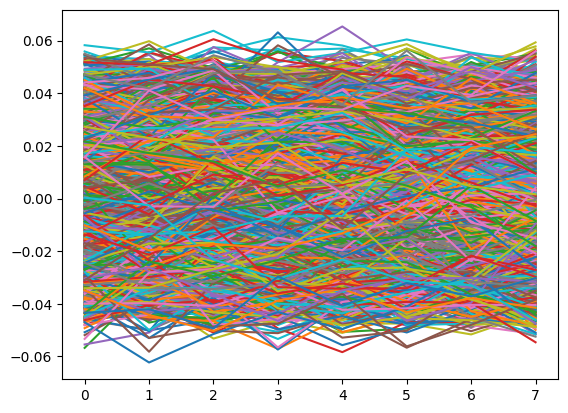

In [288]:
for n in range(x_train.shape[0]):
    plt.plot(x_train[n,1:])
plt.show()


In [261]:
# num_classes = y_train.shape[1]
########################################
# input_shape = (1,5,1)
# x = np.arange(np.prod(input_shape)).reshape(input_shape)      # test cropping#
# print(x)
# y = keras.layers.Cropping1D(cropping=(0,4))(x)
# z = keras.layers.Cropping1D(cropping=(1,0))(x)
# print(y)
# print(z)

In [289]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    d_1 = keras.layers.Cropping1D(cropping=(0,input_shape[0]-1))(input_layer)
    sig = keras.layers.Cropping1D(cropping=(1,0))(input_layer)
    
#     conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(sig)
#     conv1 = keras.layers.BatchNormalization()(conv1)
#     conv1 = keras.layers.ReLU()(conv1)

#     conv2 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv1)
#     conv2 = keras.layers.BatchNormalization()(conv2)
#     conv2 = keras.layers.ReLU()(conv2)

#     conv3 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv2)
#     conv3 = keras.layers.BatchNormalization()(conv3)
#     conv3 = keras.layers.ReLU()(conv3)

#     gap = keras.layers.GlobalAveragePooling1D()(conv3)
    sig = keras.layers.Reshape((sig.get_shape()[1],))(sig)
    gap = keras.layers.Dense(16, activation='relu')(sig)
    gap = keras.layers.BatchNormalization()(gap)
    gap = keras.layers.Dropout(0.5)(gap)
    gap = keras.layers.Dense(16, activation='relu')(gap)
    
    
    d_1 = keras.layers.Dense(16, activation='relu')(d_1)
    d_1 = keras.layers.Dense(8, activation='relu')(d_1)
    d_1 = keras.layers.Reshape((8,))(d_1)
    
    
    
    merged = keras.layers.Concatenate()([d_1, gap])
    merged = keras.layers.Dense(8, activation='relu')(merged)
    
    output_layer = keras.layers.Dense(2, activation="linear")(merged)
#######################################################################
#     d_1 = keras.layers.Dense(16, activation='relu')(d_1)
#     # d_1 = keras.layers.Dense(10, activation='relu')(d_1)
#     d_1 = keras.layers.Reshape((16,))(d_1)
    
#     d_1 = keras.layers.BatchNormalization()(d_1)
#     gap = keras.layers.Dense(8, activation='relu')(gap)
#     gap = keras.layers.BatchNormalization()(gap)
    
#     merged = keras.layers.Concatenate()([d_1, gap])
#     merged = keras.layers.Dense(8, activation='relu')(merged)
    
#     output_layer = keras.layers.Dense(2, activation="linear")(merged)
##########################################################################    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [290]:
epochs = 1000
batch_size = 32
#####################################################
index = [i for i in range(x_train.shape[0])]  
np.random.shuffle(index) 
x_train = x_train[index]
y_train = y_train[index]
####################################################
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="mean_squared_logarithmic_error",
    metrics=["MeanAbsoluteError"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.4,
    verbose=1,
)

Epoch 1/1000
24/24 [==============================] - 1s 20ms/step - loss: 0.0019 - mean_absolute_error: 0.1619 - val_loss: 1.3025e-13 - val_mean_absolute_error: 0.0748
Epoch 2/1000
24/24 [==============================] - 0s 12ms/step - loss: 3.5633e-05 - mean_absolute_error: 0.2124 - val_loss: 1.3025e-13 - val_mean_absolute_error: 0.0972
Epoch 3/1000
24/24 [==============================] - 0s 12ms/step - loss: 1.4159e-05 - mean_absolute_error: 0.2234 - val_loss: 1.3025e-13 - val_mean_absolute_error: 0.1010
Epoch 4/1000
24/24 [==============================] - 0s 12ms/step - loss: 1.3993e-05 - mean_absolute_error: 0.2353 - val_loss: 1.3025e-13 - val_mean_absolute_error: 0.1050
Epoch 5/1000
24/24 [==============================] - 0s 12ms/step - loss: 1.8515e-05 - mean_absolute_error: 0.2379 - val_loss: 1.3025e-13 - val_mean_absolute_error: 0.1088
Epoch 6/1000
24/24 [==============================] - 0s 11ms/step - loss: 1.1439e-06 - mean_absolute_error: 0.2367 - val_loss: 1.3025e-13 

In [264]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test error", test_acc)
print("Test loss", test_loss)

6/6 [==============================] - 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.2500
Test error 0.24999819695949554
Test loss 0.03974089398980141


In [265]:
mua = np.zeros((x_train.shape[0],))
mus = np.zeros((x_train.shape[0],))
d = np.zeros((x_train.shape[0],))
miu = np.zeros((x_train.shape[0],2))

miu = model.predict(x_train)
mua = miu[:,0]
mus = miu[:,1]
d = x_train[:,0,0]

In [266]:
i = 81
print(mua[i],mus[i])
print(y_train[i,0],y_train[i,1])

0.48348704 0.44879925
0.4614274 0.24063769


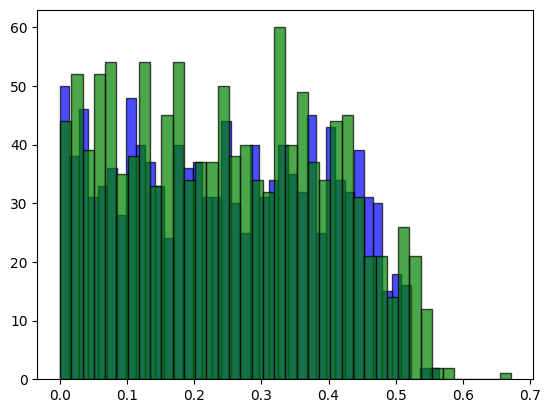

In [267]:
# print(mua,mus,d)
# print(an2[i,1],an2[i,2],an2[i,0])
# plt.plot(abs(an1[:,1]-mua))
# plt.plot(abs(an1[:,2]-mus))
plt.hist(abs(an1[:,1]-mua), bins=40,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(abs(an1[:,2]-mus), bins=40,  facecolor="green", edgecolor="black", alpha=0.7)
plt.show()

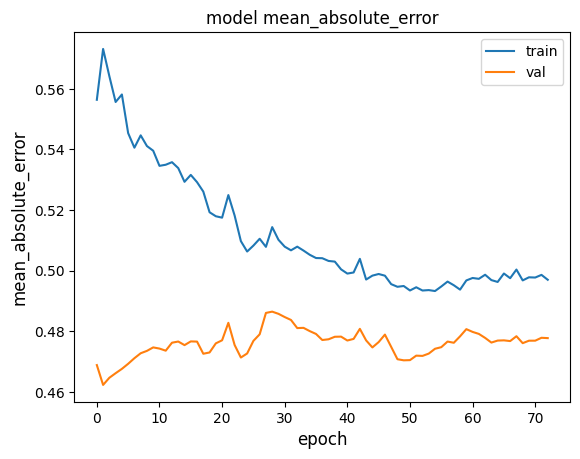

In [220]:
metric = "mean_absolute_error"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
# 你可以用pca或者一些降维方法把特征搞一下